# 8.8 卷积神经网络

In [3]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week8/dataset/training_set',target_size=(50,50),batch_size=32,class_mode='binary')

Found 8000 images belonging to 2 classes.


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

model = Sequential()
# 卷积层
model.add(Conv2D(32,(3,3),input_shape=(50,50,3),activation='relu'))
# 池化层
model.add(MaxPool2D(pool_size=(2,2)))
# 卷积层
model.add(Conv2D(32,(3,3),activation='relu'))
# 池化层
model.add(MaxPool2D(pool_size=(2,2)))
# flattening layer
model.add(Flatten())
# FC layer
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [6]:
# configure the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [8]:
# train the model
model.fit_generator(training_set,epochs=25)

Epoch 1/25


C:\Users\echoc\.conda\envs\mooc37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


250/250 [==============================] - 23s 88ms/step - loss: 0.6648 - accuracy: 0.5851
Epoch 2/25
250/250 [==============================] - 18s 72ms/step - loss: 0.5822 - accuracy: 0.6880
Epoch 3/25
250/250 [==============================] - 18s 71ms/step - loss: 0.5206 - accuracy: 0.7431
Epoch 4/25
250/250 [==============================] - 18s 70ms/step - loss: 0.4819 - accuracy: 0.7676
Epoch 5/25
250/250 [==============================] - 18s 71ms/step - loss: 0.4361 - accuracy: 0.7955
Epoch 6/25
250/250 [==============================] - 18s 71ms/step - loss: 0.3930 - accuracy: 0.8183
Epoch 7/25
250/250 [==============================] - 18s 72ms/step - loss: 0.3407 - accuracy: 0.8508
Epoch 8/25
250/250 [==============================] - 18s 73ms/step - loss: 0.2953 - accuracy: 0.8735
Epoch 9/25
250/250 [==============================] - 18s 73ms/step - loss: 0.2368 - accuracy: 0.9021
Epoch 10/25
250/250 [==============================] - 18s 72ms/step - loss: 0.1809 - accurac

In [10]:
accuracy_train =model.evaluate_generator(training_set)
accuracy_train

C:\Users\echoc\.conda\envs\mooc37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.
C:\Users\echoc\.conda\envs\mooc37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.000353325332980603, 1.0]

In [12]:
# load test img
test_set = train_datagen.flow_from_directory('D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week8/dataset/test_set',target_size=(50,50),batch_size=32,class_mode='binary')
accuracy_test = model.evaluate_generator(test_set)
accuracy_test

Found 2000 images belonging to 2 classes.


C:\Users\echoc\.conda\envs\mooc37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


[1.7650327682495117, 0.7595000267028809]

In [18]:
# 预测随机图片
# load single image
import numpy as np
from keras_preprocessing.image import load_img,img_to_array
pic_dog = 'D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week8/dog.jpg'
pic_dog = load_img(pic_dog,target_size=(50,50))
pic_dog = img_to_array(pic_dog)
pic_dog = pic_dog/255
pic_dog = pic_dog.reshape(1,50,50,3)
result = model.predict(pic_dog)
result

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

In [20]:
# 预测随机图片
# load single image
from keras_preprocessing.image import load_img,img_to_array
pic_cat = 'D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week8/cat1.jpg'
pic_cat = load_img(pic_cat,target_size=(50,50))
pic_cat = img_to_array(pic_cat)
pic_cat = pic_cat/255
pic_cat = pic_cat.reshape(1,50,50,3)
result = model.predict(pic_cat)
result

1/1 [==============================] - 0s 18ms/step


array([[0.01777554]], dtype=float32)

In [21]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

## VGG16猫狗分类

In [23]:
img_path = 'D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week8/1.jpg'
img = load_img(img_path,target_size=(244,244))
img = img_to_array(img)
type(img)

numpy.ndarray

In [24]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

model_vgg = VGG16(weights='imagenet',include_top=False)
x = np.expand_dims(img,axis=0)
x = preprocess_input(x)

58889256/58889256 [==============================] - 489s 8us/step


In [25]:
x.shape

(1, 244, 244, 3)

In [26]:
# 特征提取
features = model_vgg.predict(x)
features.shape

1/1 [==============================] - 0s 228ms/step


(1, 7, 7, 512)

In [27]:
features = features.reshape(1,-1)
features.shape

(1, 25088)

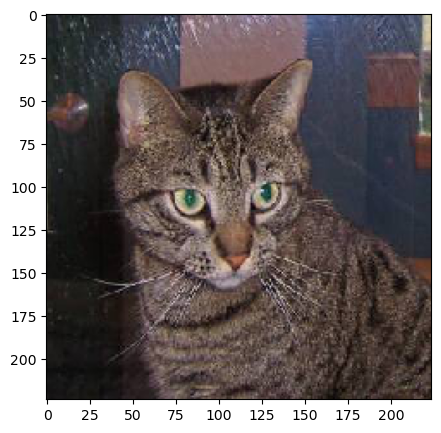

In [30]:
# visualize the data
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5,5))
img = load_img(img_path,target_size=(224,224))
plt.imshow(img)

In [33]:
#load image and preprocess it with vgg16 structure
#--by flare
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

model_vgg = VGG16(weights='imagenet', include_top=False)
#define a method to load and preprocess the image
def modelProcess(img_path,model):
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    x = np.expand_dims(img,axis=0)
    x = preprocess_input(x)
    x_vgg = model.predict(x)
    x_vgg = x_vgg.reshape(1,25088)
    return x_vgg
#list file names of the training datasets
import os
folder = "D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week8/dataset/data_vgg/cats"
dirs = os.listdir(folder)
#generate path for the images
img_path = []
for i in dirs:
    if os.path.splitext(i)[1] == ".jpg":
        img_path.append(i)
img_path = [folder+"//"+i for i in img_path]

#preprocess multiple images
features1 = np.zeros([len(img_path),25088])
for i in range(len(img_path)):
    feature_i = modelProcess(img_path[i],model_vgg)
    print('preprocessed:',img_path[i])
    features1[i] = feature_i

folder = "D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week8/dataset/data_vgg/dogs"
dirs = os.listdir(folder)
img_path = []
for i in dirs:
    if os.path.splitext(i)[1] == ".jpg":
        img_path.append(i)
img_path = [folder+"//"+i for i in img_path]
features2 = np.zeros([len(img_path),25088])
for i in range(len(img_path)):
    feature_i = modelProcess(img_path[i],model_vgg)
    print('preprocessed:',img_path[i])
    features2[i] = feature_i

#label the results
print(features1.shape,features2.shape)
y1 = np.zeros(300)
y2 = np.ones(300)

#generate the training data
X = np.concatenate((features1,features2),axis=0)
y = np.concatenate((y1,y2),axis=0)
y = y.reshape(-1,1)
print(X.shape,y.shape)

1/1 [==============================] - 0s 441ms/step
preprocessed: D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week8/dataset/data_vgg/cats//cat.1.jpg
1/1 [==============================] - 0s 118ms/step
preprocessed: D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week8/dataset/data_vgg/cats//cat.10.jpg
1/1 [==============================] - 0s 117ms/step
preprocessed: D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week8/dataset/data_vgg/cats//cat.100.jpg
1/1 [==============================] - 0s 133ms/step
preprocessed: D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week8/dataset/data_vgg/cats//cat.101.jpg
1/1 [==============================] - 0s 127ms/step
preprocessed: D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week8/dataset/data_vgg/cats//cat.102.jpg
1/1 [==============================] - 0s 131ms/step
preprocessed: D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week8/dataset/data_vgg/cats//cat.103.jpg
1/1 [==

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)
X_train.shape,X_test.shape,X.shape

((420, 25088), (180, 25088), (600, 25088))

In [36]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=10,activation='relu',input_dim=25088))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                250890    
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 250,901
Trainable params: 250,901
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
14/14 [==============================] - 1s 3ms/step - loss: 1.1507 - accuracy: 0.8071
Epoch 2/50
14/14 [==============================] - 0s 3ms/step - loss: 0.1639 - accuracy: 0.9619
Epoch 3/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.9929
Epoch 4/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0666 - accuracy: 0.9952
Epoch 5/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9929
Epoch 6/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9976
Epoch 7/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9952
Epoch 8/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 1.0000
Epoch 9/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9952
Epoch 10/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 1.0000
Epoch 11/50
14/14 [

In [44]:
from sklearn.metrics import accuracy_score
y_train_predict = model.predict(X_train)
y_train_predict = np.round(y_train_predict).astype(int)
accuracy_train = accuracy_score(y_train,y_train_predict)
accuracy_train

14/14 [==============================] - 0s 2ms/step


1.0

In [45]:
y_test_predict = model.predict(X_test)
y_test_predict = np.round(y_test_predict).astype(int)
accuracy_test = accuracy_score(y_test,y_test_predict)
accuracy_test

6/6 [==============================] - 0s 2ms/step


0.9722222222222222

1/1 [==============================] - 0s 17ms/step


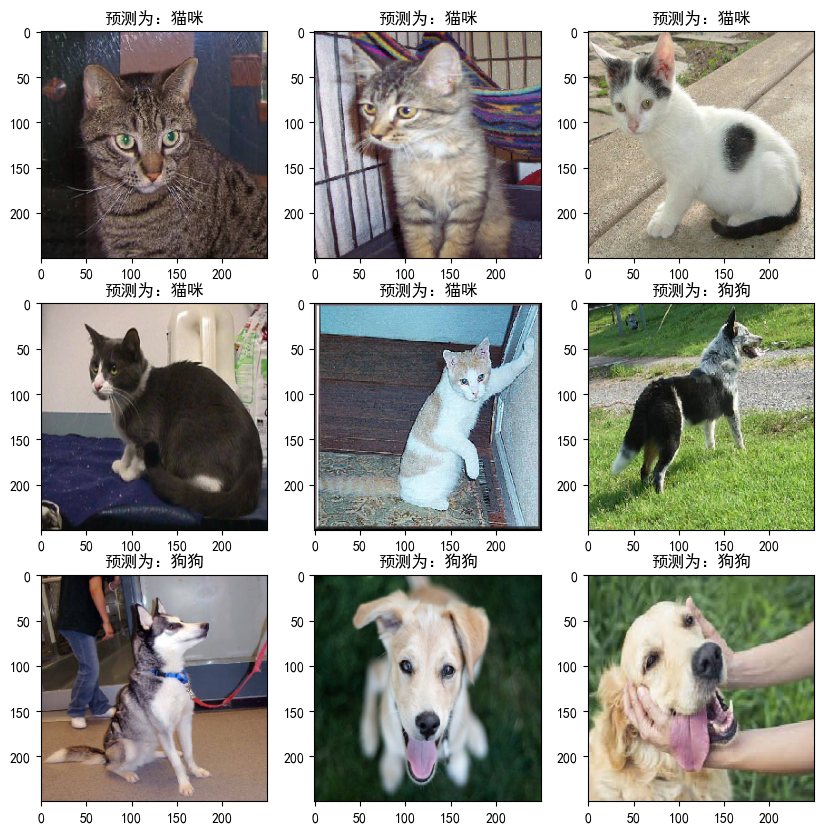

In [48]:
# coding:utf-8
import matplotlib as mlp
font2 = {'family' : 'SimHei',
         'weight' : 'normal',
         'size'   : 20,
         }
mlp.rcParams['font.family'] = 'SimHei'
mlp.rcParams['axes.unicode_minus'] = False
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.models import load_model
#from cv2 import load_img
a = [i for i in range(1,10)]
fig = plt.figure(figsize=(10,10))
for i in a:
    img_name = 'D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week8/' + str(i)+'.jpg'
    img_path = img_name
    img = load_img(img_path, target_size=(224, 224))
    img = img_to_array(img)
    x = np.expand_dims(img,axis=0)
    x = preprocess_input(x)
    x_vgg = model_vgg.predict(x)
    x_vgg = x_vgg.reshape(1,25088)
    result = model.predict(x_vgg)
    result = np.round(result).astype(int)
    img_ori = load_img(img_name, target_size=(250, 250))
    plt.subplot(3,3,i)
    plt.imshow(img_ori)
    plt.title('预测为：狗狗' if result[0][0] == 1 else '预测为：猫咪')
plt.show()